In [1]:
# data manipulation 
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
from os import path
from datetime import datetime
import itertools
import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare_exercise


In [2]:
df = acquire.get_all_data()
# def prep_store_data(df):
#     return (df.assign(ds=pd.to_datetime(df.sale_date)).sort_values('ds')
#             .assign(y=df.sale_amount * df.item_price)\
#             .groupby(['ds'])['y'].sum().reset_index().set_index('ds'))
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
df = prepare_exercise.prep_store_data(df)

In [5]:

df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,01-Jan,2-Tue,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,25.16


In [8]:
target_vars=['sale_amount','sales_total']
df = df.resample('D')[target_vars].sum()

In [9]:
def split_store_data(df, train_prop=.66): 
    train_size = int(len(df) * train_prop)
    train, test = df[0:train_size].reset_index(), df[train_size:len(df)].reset_index()
    return train, test

In [10]:
train, test = split_store_data(df, train_prop=.66)

print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1826
Training Observations: 1205
Testing Observations: 621


In [11]:
train = train.set_index('sale_date')
test = test.set_index('sale_date')



In [12]:
def evaluate(target_var, train = train, test = test, output=True):
    mse = metrics.mean_squared_error(test[target_var], yhat[target_var])
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse

def plot_and_eval(target_vars, train = train, test = test, metric_fmt = '{:.2f}', linewidth = 4):
    if type(target_vars) is not list:
        target_vars = [target_vars]

    plt.figure(figsize=(16, 8))
    plt.plot(train[target_vars],label='Train')
    plt.plot(test[target_vars], label='Test')

    for var in target_vars:
        mse, rmse = evaluate(target_var = var, train = train, test = test, output=False)
        plt.plot(yhat[var], linewidth=linewidth)
        print(f'{var} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse))

    plt.show()

In [13]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'metric', 'value'])
eval_df

,model_type,target_var,metric,value


In [14]:
def append_eval_df(model_type, target_vars, train = train, test = test):
    temp_eval_df = pd.concat([pd.DataFrame([[model_type, i, 'mse', evaluate(target_var = i, 
                                                                            train = train, 
                                                                            test = test, 
                                                                            output=False)[0]],
                                            [model_type, i, 'rmse', evaluate(target_var = i, 
                                                                             train = train, 
                                                                             test = test, 
                                                                             output=False)[1]]],
                                           columns=['model_type', 'target_var', 'metric', 'value']) 
                              for i in target_vars], ignore_index=True)
    return eval_df.append(temp_eval_df, ignore_index=True)

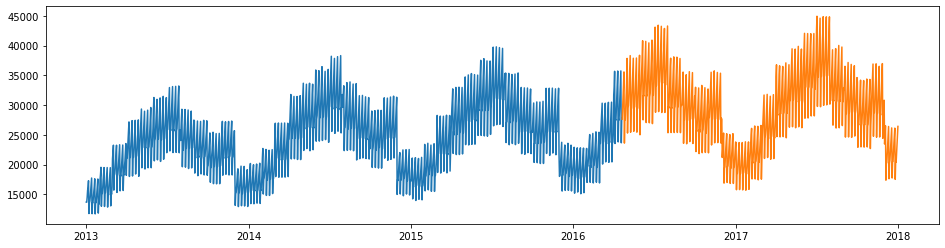

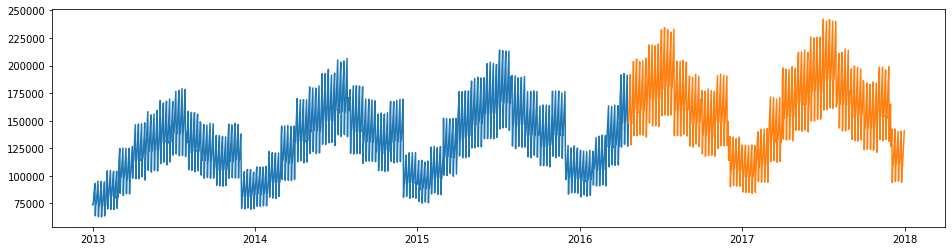

In [15]:
for var in range(len(target_vars)):
    plt.figure(figsize=(16, 4))
    plt.plot(train[target_vars[var]])
    plt.plot(test[target_vars[var]])
    plt.show()


In [16]:
yhat = pd.DataFrame(test[target_vars])
for var in target_vars:
    yhat[var] = int(train[var][-1:])

In [17]:
yhat.head()

,sale_amount,sales_total
sale_date,,
2016-04-20 00:00:00+00:00,27752,149645
2016-04-21 00:00:00+00:00,27752,149645
2016-04-22 00:00:00+00:00,27752,149645
2016-04-23 00:00:00+00:00,27752,149645
2016-04-24 00:00:00+00:00,27752,149645


In [18]:
for var in target_vars:
    print(var, ":", yhat[var].min() == yhat[var].max())

sale_amount : True
sales_total : True


sale_amount -- MSE: 42529314.64 RMSE: 6521.45
sales_total -- MSE: 1218453415.13 RMSE: 34906.35


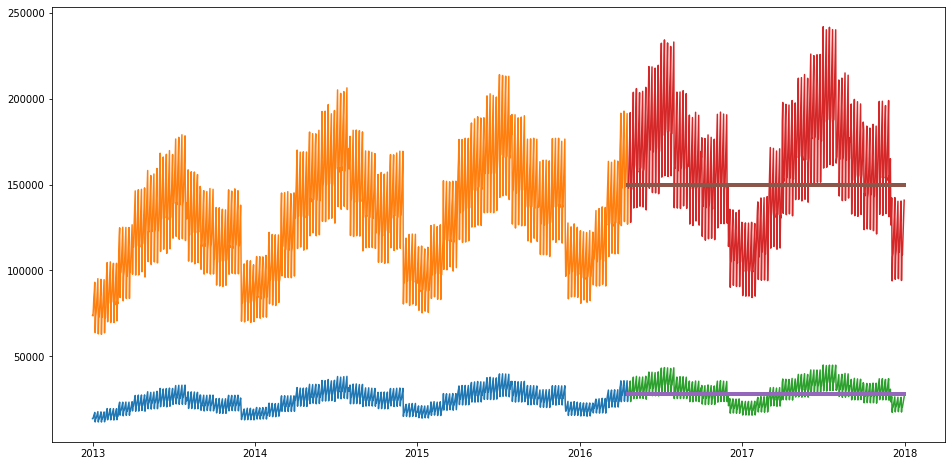

In [19]:
plot_and_eval(target_vars=target_vars, train = train, test = test)

In [20]:
eval_df = append_eval_df(model_type = 'last_observed_value', target_vars=target_vars, train = train, test = test)

In [21]:
for var in target_vars:
    yhat[var] = train[var].mean()

sale_amount -- MSE: 69484364.44 RMSE: 8335.73
sales_total -- MSE: 2005573188.71 RMSE: 44783.63


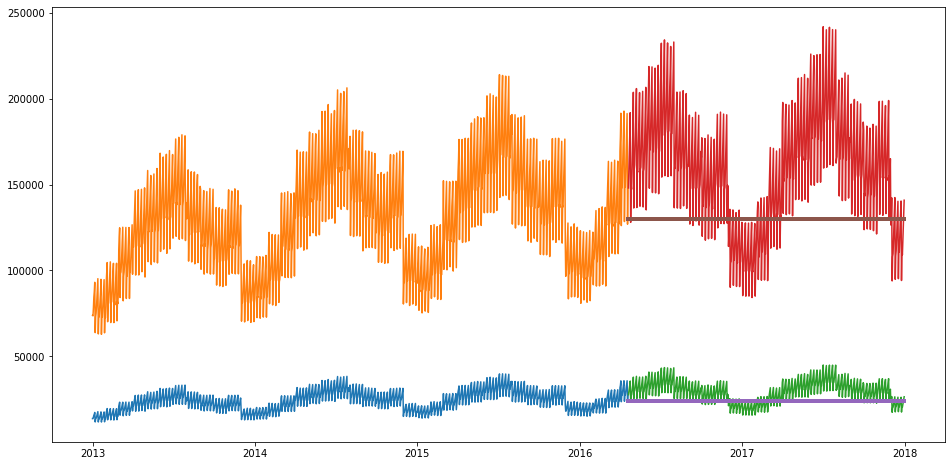

In [22]:
plot_and_eval(target_vars, train = train, test = test)

In [23]:
eval_df = append_eval_df(model_type='simple_average', target_vars=target_vars, train = train, test = test)
eval_df

,model_type,target_var,metric,value
0,last_observed_value,sale_amount,mse,4.252931e+07
1,last_observed_value,sale_amount,rmse,6.521450e+03
2,last_observed_value,sales_total,mse,1.218453e+09
3,last_observed_value,sales_total,rmse,3.490635e+04
4,simple_average,sale_amount,mse,6.948436e+07
5,simple_average,sale_amount,rmse,8.335728e+03
6,simple_average,sales_total,mse,2.005573e+09
7,simple_average,sales_total,rmse,4.478363e+04


In [24]:
periods = 30
for var in target_vars:
    yhat[var] = train[var].rolling(periods).mean().iloc[-1]

sale_amount -- MSE: 41267510.61 RMSE: 6423.98
sales_total -- MSE: 1190931799.27 RMSE: 34509.88


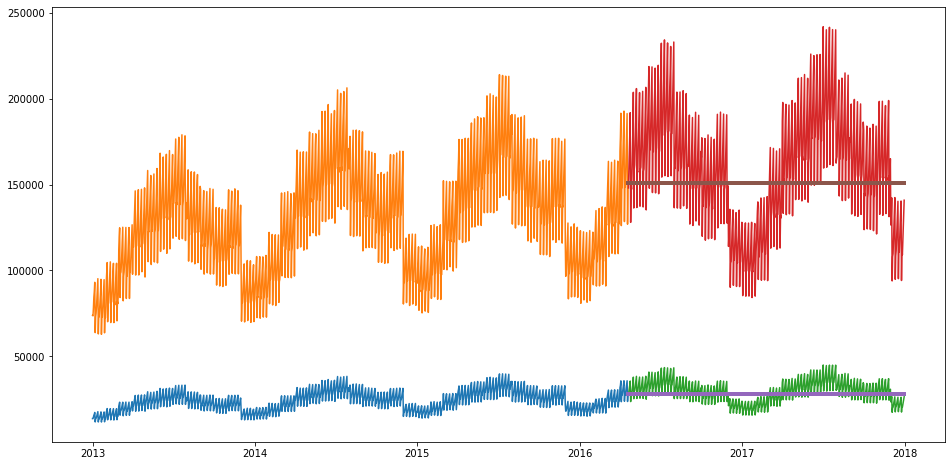

In [25]:
plot_and_eval(target_vars, train = train, test = test)

In [26]:
eval_df = append_eval_df(model_type='moving_average', target_vars=target_vars, train = train, test = test)

sale_amount -- MSE: 41267510.61 RMSE: 6423.98
sales_total -- MSE: 1190931799.27 RMSE: 34509.88


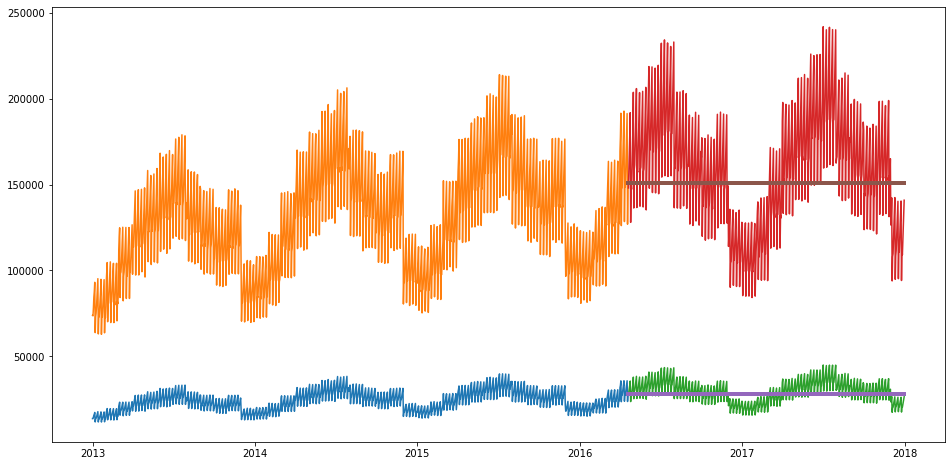


rolling averge period: 1
sale_amount
MSE:  42529314.639291465
RMSE: 6521.45034783609

rolling averge period: 1
sales_total
MSE:  1218439218.4223528
RMSE: 34906.14871942124

rolling averge period: 4
sale_amount
MSE:  38383696.491646536
RMSE: 6195.457730599615

rolling averge period: 4
sales_total
MSE:  1108123460.1111584
RMSE: 33288.48840231647

rolling averge period: 12
sale_amount
MSE:  38379669.00372383
RMSE: 6195.132686530921

rolling averge period: 12
sales_total
MSE:  1109636561.8966641
RMSE: 33311.207751996386

rolling averge period: 26
sale_amount
MSE:  39286759.33485788
RMSE: 6267.915070807667

rolling averge period: 26
sales_total
MSE:  1134206108.411572
RMSE: 33677.976608038254

rolling averge period: 52
sale_amount
MSE:  46265565.41841097
RMSE: 6801.879550419206

rolling averge period: 52
sales_total
MSE:  1334512552.9426928
RMSE: 36530.980727906724

rolling averge period: 104
sale_amount
MSE:  75819358.16969195
RMSE: 8707.431203844906

rolling averge period: 104
sales_tota

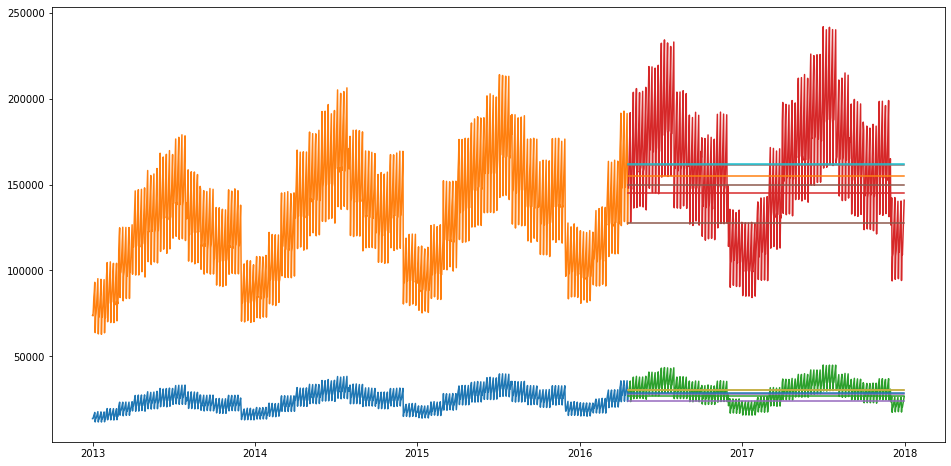

In [27]:
periods = 30
periods = 30
for var in target_vars:
    yhat[var] = train[var].rolling(periods).mean().iloc[-1]

plot_and_eval(target_vars, train, test)
eval_df = append_eval_df(model_type='moving_average', target_vars=target_vars, train = train, test = test)

plt.figure(figsize=(16, 8))
plt.plot(train[target_vars],label='Train')
plt.plot(test[target_vars], label='Test')
period_vals = [1, 4, 12, 26, 52, 104]
for p in period_vals:
    for var in target_vars:
        yhat[var] = train[var].rolling(p).mean().iloc[-1]
        plt.plot(yhat[var])
        print('\nrolling averge period:',p)
        print(var)
        evaluate(var, train = train, test = test)